# Exploratory Data Analysis of Text in Scam Reports

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
from plotnine import ggplot, geom_point, aes, theme, element_text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%pprint

Pretty printing has been turned OFF


## Define functions

In [2]:
def read_csv(path):
    
    """This function reads a CSV file from a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path, nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

## Load the dataset

In [3]:
# Load dataset, with submission ID as the index
scam_df = read_csv("Data/scam_data_4.csv").reset_index()

# Create a separate dataframe for text EDA
text_scam_df = scam_df[['submission_id', 'date', 'preprocessed_text', 'stopwords_removed', 'lemmatised', 'scam_type', 'len_preprocessed_text', 'len_lemmatised']]

# Check first five rows...
text_scam_df.head()

,submission_id,date,preprocessed_text,stopwords_removed,lemmatised,scam_type,len_preprocessed_text,len_lemmatised
0,20200717-fBLC6F,2020-07-17,they call me by whatsapp it was strange for th...,call whatsapp strange number dbs bank logo con...,call whatsapp strange number dbs bank logo con...,Impersonation Scam,85,36
1,20200717-yOxIAl,2020-07-17,it happened this morning hrs i received a phon...,happened morning hrs received phone call numbe...,happen morning hrs receive phone call number r...,Phishing Scam,52,24
2,20200717-Tz5TyW,2020-07-17,i rceived a call from a lady claiming to be ca...,rceived call lady claiming calling singtel sta...,rceiv call lady claim call singtel start call ...,Phishing Scam,249,117
3,20200716-O79B6r,2020-07-16,details i received a call from what seemed lik...,details received call seemed like singapore mo...,detail receive call seem like singapore mobile...,Impersonation Scam,246,127
4,20200716-yIa3LH,2020-07-16,an impersonated junior technical staff called ...,impersonated junior technical staff called hom...,impersonate junior technical staff call home s...,Phishing Scam,180,98


## Statistical Summaries

In [4]:
text_scam_df.describe()

,len_preprocessed_text,len_lemmatised
count,4554.000000,4554.000000
mean,98.929732,50.220466
std,85.393341,40.805998
min,2.000000,1.000000
25%,56.250000,29.000000
50%,84.000000,43.000000
75%,98.000000,52.000000
max,1792.000000,775.000000


### Distribution of lengths of scam reports by scam types (before removing stop words and lemmatisation)

In [5]:
# Create a dataframe sorted by median length of tokens after lemmatisation
df = text_scam_df.groupby(by=['scam_type']).median().sort_values('len_preprocessed_text', ascending=True).reset_index()

# Reorder the categories of scam types according to median lengths of tokens
df['scam_type'].cat.set_categories(new_categories=list(df['scam_type']), ordered=True, inplace=True)

# Convert to integer data types
df.len_preprocessed_text = df.len_preprocessed_text.astype(int)
df.len_lemmatised = df.len_lemmatised.astype(int)

# Sort in descending order
df = df.sort_values('len_lemmatised', ascending=False).reset_index()

# Check first five rows...
df.head()

,index,scam_type,len_preprocessed_text,len_lemmatised
0,20,Loan Scam,153,76
1,18,Internet Love Scam,94,50
2,19,Credit-for-Sex Scam,95,48
3,17,Home/Room Rental Scam,90,48
4,16,Inheritance Scam,89,47


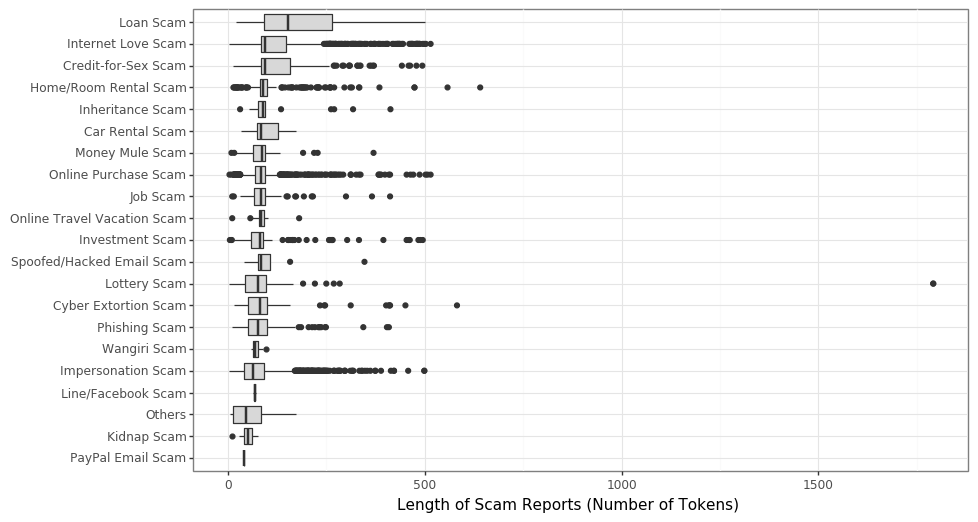

<ggplot: (-9223371852134908152)>

In [6]:
g1 = (p9.ggplot(data=text_scam_df) 
+ p9.geom_boxplot(aes(x='scam_type', y='len_preprocessed_text'), fill = "#d8d8d8")
+ p9.theme_bw() 
+ p9.coord_flip()
+ p9.theme(figure_size=(10, 6), axis_text_x = element_text(rotation=0)) 
+ p9.xlab('') 
+ p9.ylab('Length of Scam Reports (Number of Tokens)')
+ p9.scale_x_discrete(limits=df.scam_type.tolist()[::-1]))

g1

In [7]:
# Save the plot
# g1.save("Figures/no_title_boxplots.png", width=10, height=5, dpi=800)

### Distribution of lengths of scam reports by scam types (before removing stop words and lemmatisation)

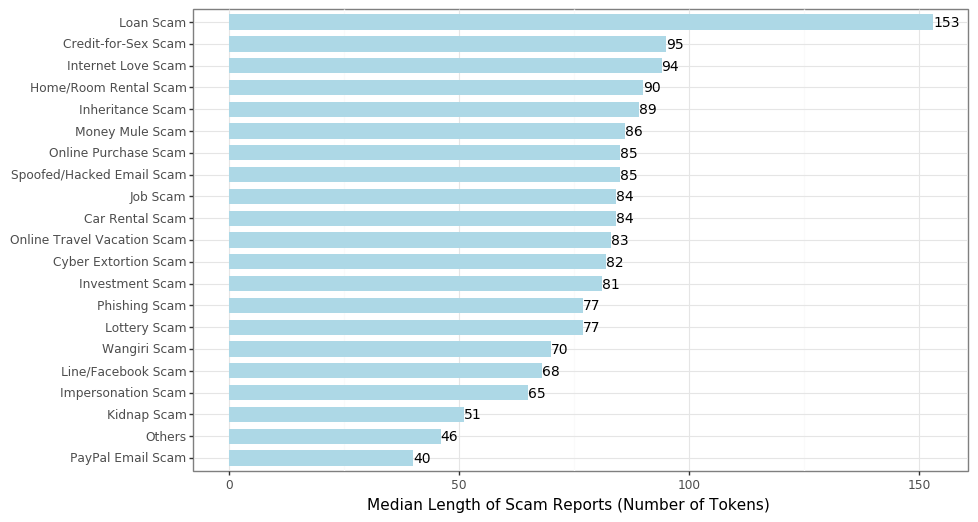

<ggplot: (-9223371852134428232)>

In [8]:
g2 = (p9.ggplot(data=df, 
          mapping=p9.aes(x='scam_type', y='len_preprocessed_text')) 
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_bw() 
+ p9.theme(figure_size=(10, 6)) 
+ p9.coord_flip()
+ p9.xlab('') 
+ p9.geom_text(p9.aes(label='len_preprocessed_text'), ha='left', va='center', size=10)
+ p9.ylab('Median Length of Scam Reports (Number of Tokens)')) 

g2

In [9]:
# Save the plot
# g2.save("Figures/no_title_median_length_preprocessed.png", width=10, height=5, dpi=800)

### Distribution of lengths of scam reports by scam types (after removing stop words and lemmatisation)

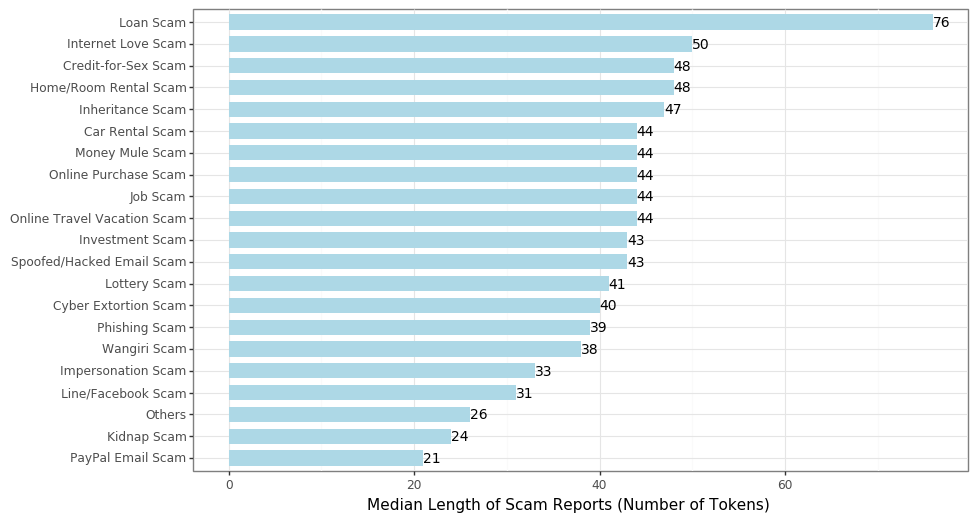

<ggplot: (-9223371852134551088)>

In [10]:
g3 = (p9.ggplot(data=df, 
          mapping=p9.aes(x='scam_type', y='len_lemmatised')) 
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.theme_bw() 
+ p9.theme(figure_size=(10, 6)) 
+ p9.coord_flip()
+ p9.xlab('') 
+ p9.geom_text(p9.aes(label='len_lemmatised'), ha='left', va='center', size=10)
+ p9.ylab('Median Length of Scam Reports (Number of Tokens)')
+ p9.scale_x_discrete(limits=df.scam_type.tolist()[::-1])) 

g3

In [11]:
# Save the plot
# g3.save("Figures/no_title_median_length.png", width=10, height=5, dpi=800)

### Distribution of lengths of scam reports (after removing stop words and lemmatisation)

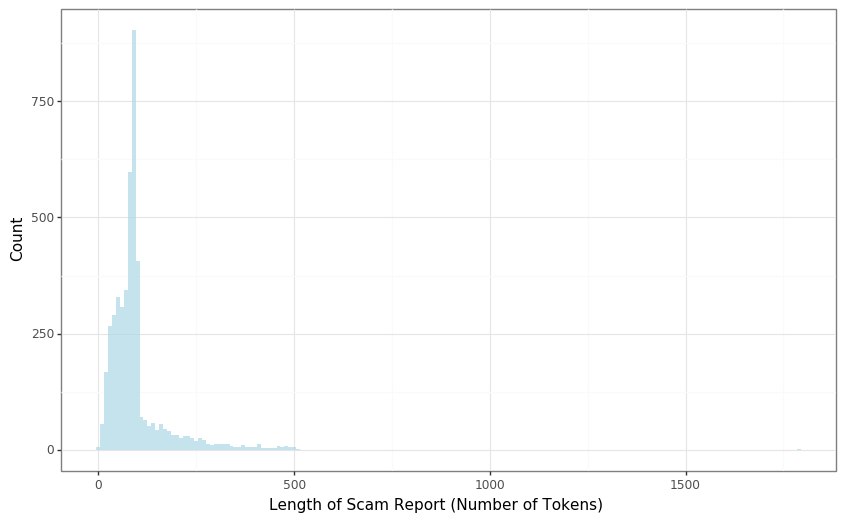

<ggplot: (-9223371852134883176)>

In [12]:
g4 = (p9.ggplot(data=text_scam_df) 
+ p9.geom_histogram(aes(x='len_preprocessed_text'), binwidth=10, fill='#ADD8E6', alpha=0.7)
+ p9.theme_bw() 
+ p9.theme(figure_size=(10, 6)) 
+ p9.xlab('Length of Scam Report (Number of Tokens)') 
+ p9.ylab('Count')) 
# + p9.ggtitle('After Removing Stopwords and Lemmatisation'))

g4

In [13]:
# Save the plot
# g4.save("Figures/no_title_dist_token_length.png", width=10, height=5, dpi=800)

### Distribution of lengths of scam reports by scam types (after removing stop words and lemmatisation)

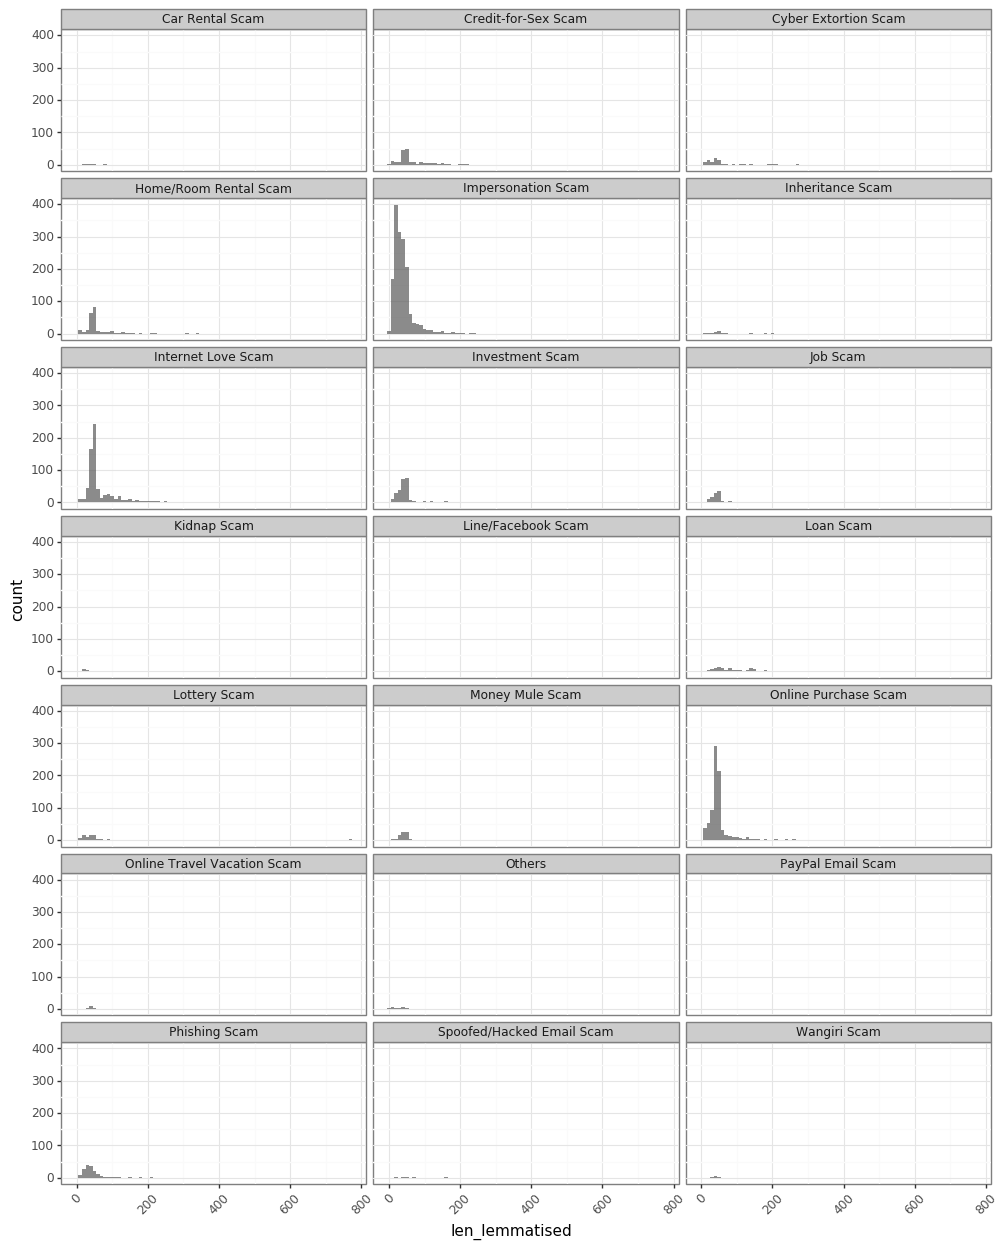

<ggplot: (-9223371852134908020)>

In [14]:
g5 = (p9.ggplot(data=text_scam_df, 
           mapping=p9.aes(x='len_lemmatised'))
+ p9.geom_histogram(alpha=0.7, binwidth=10)
+ p9.facet_wrap("scam_type", ncol=3) 
+ p9.theme_bw() 
+ p9.theme(figure_size=(12, 15), axis_text_x = element_text(rotation=45)))

g5

## Most Important Tokens

Here, we explore three configurations:
- Configuration 1: Frequency of tokens before removing stop words;
- Configuration 2: Frequency of tokens after removing stop words;
- Configuration 3: TF-IDF

### Configuration 1

In [15]:
docs0 = text_scam_df['preprocessed_text'].tolist()
cv0 = CountVectorizer()
vector0 = cv0.fit_transform(docs0)
feature_names0 = cv0.get_feature_names()
dense0 = vector0.todense()
denselist0 = dense0.tolist()
df0 = pd.DataFrame(denselist0, columns=feature_names0)
df0 = df0.sum(axis=0).sort_values(ascending=False).to_frame()

# Top 10, melted
df0 = pd.melt(df0.head(10).reset_index(), value_vars=[0], id_vars=['index'])
df0

,index,variable,value
0,to,0,18363
1,the,0,14674
2,and,0,13355
3,he,0,8473
4,me,0,7293
5,that,0,5898
6,is,0,5666
7,my,0,5392
8,in,0,5365
9,for,0,5351


### Configuration 2

In [ ]:
docs2 = text_scam_df['lemmatised'].tolist()
cv2 = CountVectorizer()
vector2 = cv2.fit_transform(docs2)
feature_names2 = cv2.get_feature_names()
dense2 = vector2.todense()
denselist2 = dense2.tolist()
df2 = pd.DataFrame(denselist2, columns=feature_names2)
df2 = df2.sum(axis=0).sort_values(ascending=False).to_frame()

# Top 10, melted
df2 = pd.melt(df2.head(10).reset_index(), value_vars=[0], id_vars=['index'])
df2 = df2.replace(0, 2)
df2

### Configuration 3

In [ ]:
docs = list(text_scam_df['lemmatised'])
vectorizer = TfidfVectorizer(use_idf=True, max_features=10000)
vectors = vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df = df.sum(axis=0).sort_values(ascending=False).to_frame()

# Top 10, melted
df = pd.melt(df.head(10).reset_index(), value_vars=[0], id_vars=['index']) 
df = df.replace(0, 3)
df

### Visualisation

In [ ]:
top10_df = pd.concat([df0, df2])
top10_df.columns = ['token', 'config', 'count']
top10_df = top10_df.replace(0, 'Configuration 1') # Before removing stopwords and lemmatisation
top10_df = top10_df.replace(2, 'Configuration 2') # After removing stopwords and lemmatisation
top10_df['config_pa'] = top10_df['config'].astype(str) + top10_df['token']
top10_df['count'] = top10_df['count'].astype(int)
top10_df.head()

In [ ]:
g6 = (p9.ggplot(data=top10_df, 
        mapping=p9.aes(x='reorder(config_pa, count)', y='count'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.facet_wrap("~config", ncol=2, scales='free')
+ p9.theme_bw() 
+ p9.ylab("Number of Tokens")
+ p9.xlab("") 
+ p9.theme(subplots_adjust={'wspace': 0.25}, figure_size=(13, 5), axis_text_x = p9.element_text(rotation=90, size=14))
+ p9.scale_x_discrete(labels=lambda lbls : [s[15:] for s in lbls])
+ p9.geom_text(p9.aes(label='count'), ha='center', va='bottom', size=9)
)

g6

In [ ]:
# Save the plot
# g6.save("Figures/no_title_top10_tokens.png", width=10, height=4, dpi=800)

In [ ]:
top10_df1 = df
top10_df1.columns = ['token', 'config', 'count']
top10_df1 = top10_df1.replace(3, 'Configuration 3') # TF-IDF
top10_df1['config_pa'] = top10_df1['config'].astype(str) + top10_df1['token']
top10_df1['count'] = top10_df1['count'].astype(int)
top10_df1

In [ ]:
g7 = (p9.ggplot(data=top10_df1, 
        mapping=p9.aes(x='reorder(config_pa, count)', y='count'))
+ p9.geom_col(fill = "#ADD8E6", width=0.7)
+ p9.facet_wrap("~config", ncol=1, scales='free')
+ p9.theme_bw() 
+ p9.ylab("TF-IDF Score")
+ p9.xlab("") 
+ p9.theme(subplots_adjust={'wspace': 0.25}, figure_size=(10, 9), axis_text_x = p9.element_text(rotation=90, size=14))
+ p9.scale_x_discrete(labels=lambda lbls : [s[15:] for s in lbls])
+ p9.geom_text(p9.aes(label='count'), ha='center', va='bottom', size=9)
)

g7

In [ ]:
# Save the plot
# g7.save("Figures/no_title_top10_tokens_tfidf.png", width=5, height=4, dpi=800)